In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

In [2]:
messi = glob.glob('lionel_messi/*.jpg')
ronaldo = glob.glob('cristiano_ronaldo/*.jpg')
maradona = glob.glob('diego_maradona/*.jpg')
salah = glob.glob('mohamed_salah/*.jpg')
modric = glob.glob('luka_modric/*.jpg')

In [3]:
image = []
label = []
for i in messi:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in ronaldo:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in maradona:
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in salah:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

for i in modric:
    img = plt.imread(i)
    image.append(img)
    label.append(4)

In [4]:
image, label = shuffle(image, label)

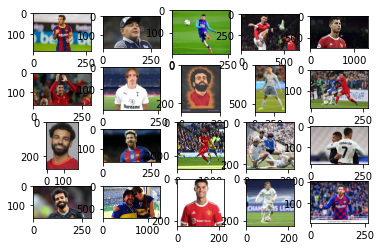

In [5]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])

In [6]:
for i in range(10):
    print(image[i].shape)

(183, 275, 3)
(168, 300, 3)
(194, 259, 3)
(423, 680, 3)
(742, 1320, 3)
(168, 300, 3)
(194, 259, 3)
(248, 203, 3)
(612, 401, 3)
(183, 275, 3)


In [7]:
X = []
for i in image:
    X.append(resize(i, (400,400,3)))

In [8]:
type(X)

list

In [9]:
X = np.array(X)

In [10]:
y = np.array(label)

In [11]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
d1,d2,d3,d4 = X.shape
X = X.reshape((d1, d2*d3*d4))
X.shape

(875, 480000)

In [13]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.svm import SVC
model = SVC()

In [16]:
%time model.fit(X_train,y_train)

CPU times: total: 12min 29s
Wall time: 8min 54s


SVC()

In [17]:
%time y_pred = model.predict(X_test)

CPU times: total: 42min 17s
Wall time: 31min 19s


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

The accuracy score is 0.6342857142857142
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        39
           1       0.64      0.58      0.61        31
           2       0.53      0.70      0.61        33
           3       0.76      0.69      0.72        32
           4       0.60      0.62      0.61        40

    accuracy                           0.63       175
   macro avg       0.65      0.64      0.64       175
weighted avg       0.64      0.63      0.64       175



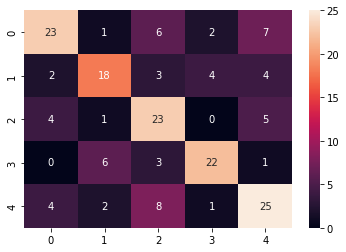

In [19]:
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True);
print(classification_report(y_test, y_pred))